In [0]:
!pip install fastai

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Importing mo
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [4]:
from keras.preprocessing import image

C:\Users\neha1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
PATH = "C:\\Users\\neha1\\Documents\\Plant-Doctor-master\\data\\crowdai"
path = "abc.jpg"

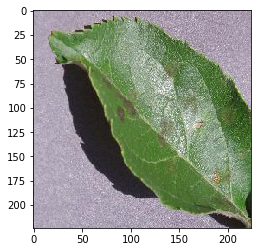

In [9]:
from matplotlib import pyplot as plt
plt.imshow(image.load_img(PATH+"\\c_0\\" +path, target_size=(224, 224)))
plt.show()

In [0]:
torch.cuda.set_device(0)

sz = 224
arch=resnet34
bs = 58
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [ ]:
names = ["Apple Scab", "Apple Black Rot", "Apple Cedar Apple Rust", "Apple Healthy", "Blueberry Healthy",
         "Cherry Powdery Mildew", "Cherry Healthy", "Corn Cercospora Gray Leaf Spot", "Corn Common Rust",
         "Corn Northern Leaf Blight", "Corn Healthy", "Grape Black Rot", "Grape Esca", "Grape Leaf Blight",
         "Grape Healthy", "Orange Haunglongbing", "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot",
         "Bell Pepper Healthy", "Potato Early Blight", "Potato Late Blight", "Potato Healthy", "Raspberry Healthy",
         "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Leaf Scorch", "Strawberry Healthy",
         "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Late Blight", "Tomato Leaf Mold",
         "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Yellow Leaf Curl Virus",
         "Tomato Mosaic Virus", "Tomato Healthy"]
num_classes = 38

In [0]:
learn.fit(1e-1, 4)

In [9]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9394104555570696, 0.22291377581439997)

**Well, seems like we are getting pretty good accuracy of 93.9 %.**

## Model Architecture

In [16]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')